In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
train.shape,test.shape

((19219, 35), (12814, 28))

In [4]:
train.head(2)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1


In [6]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr_m = LogisticRegression(multi_class='multinomial')

In [8]:
# Combine train and test

In [9]:
test.head(2)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104


In [8]:
data = pd.concat([train,test],axis=0)

In [9]:
data.shape

(32033, 35)

In [10]:
data.head(2)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
data.isnull().sum()

id                           0
X_Minimum                    0
X_Maximum                    0
Y_Minimum                    0
Y_Maximum                    0
Pixels_Areas                 0
X_Perimeter                  0
Y_Perimeter                  0
Sum_of_Luminosity            0
Minimum_of_Luminosity        0
Maximum_of_Luminosity        0
Length_of_Conveyer           0
TypeOfSteel_A300             0
TypeOfSteel_A400             0
Steel_Plate_Thickness        0
Edges_Index                  0
Empty_Index                  0
Square_Index                 0
Outside_X_Index              0
Edges_X_Index                0
Edges_Y_Index                0
Outside_Global_Index         0
LogOfAreas                   0
Log_X_Index                  0
Log_Y_Index                  0
Orientation_Index            0
Luminosity_Index             0
SigmoidOfAreas               0
Pastry                   12814
Z_Scratch                12814
K_Scatch                 12814
Stains                   12814
Dirtines

In [12]:
data.drop(columns=['id'],inplace=True)

In [13]:
data.head(2)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,584,590,909972,909977,16,8,5,2274,113,140,...,-0.5000,-0.0104,0.1417,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.7419,-0.2997,0.9491,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
# x_train,y_train,x_test,y_test,x_pred

In [15]:
x_pred = data[data['Z_Scratch'].isnull()]

In [16]:
remain_data = data[data['Z_Scratch'].notnull()]

In [17]:
submission.columns

Index(['id', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'],
      dtype='object')

In [26]:
x = remain_data.drop(columns=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'])
y = remain_data[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults']]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.75)

In [29]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((14414, 27), (4805, 27), (14414, 7), (4805, 7))

In [30]:
y_cols = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults']

In [23]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix

In [31]:
auc_s = []
for i in y_cols:
    
    model = lr_m
    model.fit(xtrain,ytrain[i])
    prob = model.predict_proba(xtest)[:,1]
    auc = roc_auc_score(ytest[i],prob)
    auc_s.append(auc)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
np.mean(auc_s)

0.7294777561272341

In [59]:
x_pred.drop(columns=y_cols,inplace=True)

C:\Users\MS\AppData\Local\Temp\ipykernel_9044\3841211628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_pred.drop(columns=y_cols,inplace=True)


In [62]:
auc_s = []
accuracy = []
for i in y_cols:
    #model train
    model = DecisionTreeClassifier(max_depth=6)
    model.fit(xtrain,ytrain[i])
    #model validation
    score = model.score(xtest,ytest[i])
    prob = model.predict_proba(xtest)[:,1]
    auc = roc_auc_score(ytest[i],prob)
    accuracy.append(score)
    auc_s.append(auc)
    #model prediction
    final_prob = model.predict_proba(x_pred)[:,1]
    submission[i] = final_prob
    

In [63]:
submission

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.330779,0.000658,0.000596,0.00053,0.031891,0.102564,0.166667
1,19220,0.138989,0.006780,0.045659,0.00053,0.181395,0.167987,0.349739
2,19221,0.000222,0.042414,0.045659,0.00053,0.010516,0.379074,0.433498
3,19222,0.123529,0.000000,0.000596,0.00053,0.010516,0.513378,0.370844
4,19223,0.000222,0.000658,0.000596,0.00053,0.010516,0.445078,0.546003
...,...,...,...,...,...,...,...,...
12809,32028,0.051181,0.142857,0.000596,0.00053,0.078278,0.600000,0.412500
12810,32029,0.138989,0.005138,0.045659,0.01380,0.078278,0.060302,0.348609
12811,32030,0.000222,0.000658,0.943059,0.00053,0.001386,0.000000,0.136646
12812,32031,0.489796,0.005138,0.045659,0.00053,0.106667,0.060302,0.435424


In [57]:
np.mean(accuracy)

0.8899955403597444

In [39]:
np.mean(auc_s)

0.8373928738838089

In [40]:
dt = DecisionTreeClassifier(max_depth=6)

In [41]:
dt.fit(x,y)

DecisionTreeClassifier(max_depth=6)

In [44]:
x.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

In [45]:
l = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

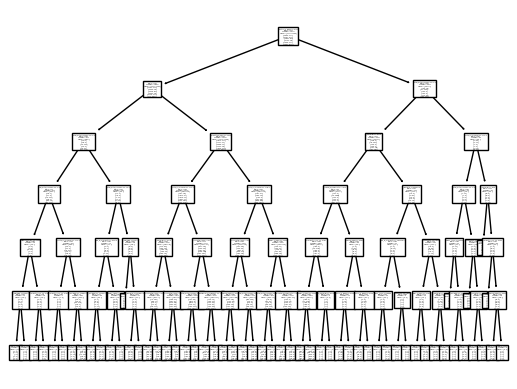

In [46]:
plot_tree(dt,feature_names=l)
plt.show()

In [55]:
dt.score(xtest,ytest)

0.3716961498439126

In [50]:
pred_dt = dt.predict(xtest)


In [51]:
print(classification_report(ytest,pred_dt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       366
           1       0.59      0.51      0.55       283
           2       0.92      0.84      0.88       888
           3       0.80      0.79      0.80       135
           4       0.00      0.00      0.00       112
           5       0.49      0.45      0.47      1178
           6       0.73      0.08      0.14      1653

   micro avg       0.68      0.36      0.47      4615
   macro avg       0.50      0.38      0.41      4615
weighted avg       0.62      0.36      0.40      4615
 samples avg       0.35      0.35      0.35      4615



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
#print(confusion_matrix(ytest,pred_dt))

In [65]:
submission.to_csv('submission2.csv',index=False)

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
auc_s = []
accuracy = []
for i in y_cols:
    #model train
    model = GradientBoostingClassifier()
    model.fit(xtrain,ytrain[i])
    #model validation
    score = model.score(xtest,ytest[i])
    prob = model.predict_proba(xtest)[:,1]
    auc = roc_auc_score(ytest[i],prob)
    accuracy.append(score)
    auc_s.append(auc)
    #model prediction
    final_prob = model.predict_proba(x_pred)[:,1]
    submission[i] = final_prob
    

In [69]:
submission.to_csv('sub1.csv',index=False)

In [71]:
from xgboost import XGBClassifier

In [72]:
auc_s = []
accuracy = []
for i in y_cols:
    #model train
    model = XGBClassifier()
    model.fit(xtrain,ytrain[i])
    #model validation
    score = model.score(xtest,ytest[i])
    prob = model.predict_proba(xtest)[:,1]
    auc = roc_auc_score(ytest[i],prob)
    accuracy.append(score)
    auc_s.append(auc)
    #model prediction
    final_prob = model.predict_proba(x_pred)[:,1]
    submission[i] = final_prob
    

In [73]:
submission.to_csv('sub2.csv',index=False)